In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

/Users/adishrao/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
dataset_dir = 'small size data'
label_dir = dataset_dir + '/test/labels/'
img_dir = dataset_dir + '/test/images/'

In [3]:
images = sorted(os.listdir(img_dir))

# mac specific .DS_STORE 
if images[0] == '.DS_Store':
    images.remove('.DS_Store')

X = []

for img_path in images:
    # load image and label, resize, append
    img = cv2.imread(img_dir + img_path)
    img = np.float32(img) / 255 # - 1 #averagin values. sohuld we remove?
    X.append(img)
        
X = np.array(X)

In [4]:
from keras.models import load_model

Using TensorFlow backend.


In [5]:
model = load_model('fb.h5') #relearn :P

In [6]:
from time import time

t = time()
y_pred = model.predict(X)
print(time() - t)

262.0758008956909


In [7]:
y_predi = np.argmax(y_pred, axis=3)

In [8]:
for pred,path in zip(y_predi,images):
    height = 640
    width = 400
    pred = np.array(pred, dtype='uint8')
    label = cv2.resize(pred, (width, height))
    np.save(arr=label,file=f'{label_dir}{path[:-4]}.npy')

In [10]:
loaded = np.load(f'{label_dir}{images[1][:-4]}.npy')

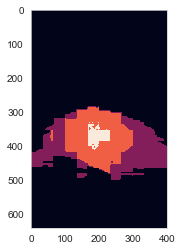

In [11]:
plt.imshow(loaded)

In [12]:
fil = open('submission.txt','w')

In [14]:
li = []
for path in images:
    li.append(f'/Users/adishrao/Desktop/FB/{label_dir}{path[:-4]}.npy')

In [15]:
li

['/Users/adishrao/Desktop/FB/small size data/test/labels/000000337000.npy',
 '/Users/adishrao/Desktop/FB/small size data/test/labels/000000337001.npy',
 '/Users/adishrao/Desktop/FB/small size data/test/labels/000000337002.npy',
 '/Users/adishrao/Desktop/FB/small size data/test/labels/000000337003.npy',
 '/Users/adishrao/Desktop/FB/small size data/test/labels/000000337004.npy',
 '/Users/adishrao/Desktop/FB/small size data/test/labels/000000337005.npy',
 '/Users/adishrao/Desktop/FB/small size data/test/labels/000000337006.npy',
 '/Users/adishrao/Desktop/FB/small size data/test/labels/000000337007.npy',
 '/Users/adishrao/Desktop/FB/small size data/test/labels/000000337008.npy',
 '/Users/adishrao/Desktop/FB/small size data/test/labels/000000337009.npy',
 '/Users/adishrao/Desktop/FB/small size data/test/labels/000000337010.npy',
 '/Users/adishrao/Desktop/FB/small size data/test/labels/000000337011.npy',
 '/Users/adishrao/Desktop/FB/small size data/test/labels/000000337012.npy',
 '/Users/adi

In [17]:
for path in li:
    fil.write(path+'\n')